###  Exploratory Data Analysis (EDA)
- [2.1 Overview](#2_1) 
- [2.2 Summary and Prepping](#2_2) 
- [2.3 Listing Analysis ](#2_3) 
  - [2.3.1 Amenities vs Price](#2.3.1)
  - [2.3.2]
  - [2.3.3]
- [2.4 Census Analysis ](#2_4)
  - [2.4.1]
  - [2.4.2]
  - [2.4.3]

### 2.1 Overview

- In our EDA, we compare and identify patterns and trends based on the listing (df_listing_with_zip_codes.csv) and the demographic's (NY_census_demographics.csv) attributes
- By analyzing and evaluating the visualizations and predictive models, we aim to better understand and summarize AirBnB's customer behavior
- Our end goal is to suggest potential actions for stakeholders based on our findings, e.g., how Airbnb prices align with rental markets, areas that might be over- or under-utilized for Airbnb hosting, and recommend prices and strategies to maximize profit

Specifically, we will consider:
- Listing Analysis
  - Amenities vs Price: do specific amenities in a listing increase its price?
- Census Analysis
  - Income

### 2.2 Summary and Prepping

In our data cleaning section, we preprocessed the listing and census data, let's take another look at what we have:

In [1]:
#import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_listing = pd.read_csv('df_listing_with_zip_codes.csv')
df_listing.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,bathrooms_text,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,$89.00,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,1 shared bath,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,$45.00,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,1 shared bath,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,$107.00,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,1 shared bath,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040
3,East Harlem,$140.00,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,2 baths,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035
4,South Slope,$340.00,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,2.5 baths,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215


In [2]:
#bathrooms and bathrooms texts are rather redundant, so we drop bathrooms text
df_listing = df_listing.drop(columns=['bathrooms_text'])
df_listing.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,$89.00,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,$45.00,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,$107.00,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040
3,East Harlem,$140.00,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035
4,South Slope,$340.00,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215


In [3]:
#we will be looking at price a lot, so we need to convert price to float, removing the $ symbol
df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)
df_listing.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,89.0,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,45.0,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,107.0,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040
3,East Harlem,140.0,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035
4,South Slope,340.0,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215


In [4]:
#bedrooms, beds, and bathrooms are all missing less than 1% of data (as shown in section 1.3 of data cleaning) so we replace the na with the median
df_listing['bedrooms'] = df_listing['bedrooms'].fillna(df_listing['bedrooms'].median())
df_listing['beds'] = df_listing['beds'].fillna(df_listing['beds'].median())
df_listing['bathrooms'] = df_listing['bathrooms'].fillna(df_listing['bathrooms'].median())

#we will also replace missing values for superhost (1.5% of data) with the mode
df_listing['host_is_superhost'] = df_listing['host_is_superhost'].fillna(df_listing['host_is_superhost'].mode()[0])

#check to make sure there's no more missing data
(df_listing.isna().sum()/df_listing.shape[0])  * 100

neighbourhood_cleansed            0.0
price                             0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
property_type                     0.0
accommodates                      0.0
bedrooms                          0.0
beds                              0.0
bathrooms                         0.0
amenities                         0.0
host_is_superhost                 0.0
neighbourhood_group_cleansed      0.0
calculated_host_listings_count    0.0
zip_code                          0.0
dtype: float64

In [5]:
census_data = pd.read_csv('NY_census_demographics.csv')
census_data.head()

,total_population,median_income,median_rent,median_home_value,vacant_units,total_units,avg_commute_time,median_age,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available,zip_code
0,71812.0,88546.0,1801.0,935000.0,3168.0,33347.0,28537.0,40.6,14178.0,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0,11209
1,93008.0,62804.0,1641.0,978800.0,2658.0,30565.0,36683.0,36.0,38012.0,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0,11220
2,43653.0,59115.0,1623.0,454000.0,889.0,17430.0,17098.0,40.3,31339.0,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0,10040
3,38595.0,36989.0,1116.0,661800.0,1406.0,16239.0,12539.0,37.1,16604.0,5033.0,30083.0,13268.0,16239.0,1612.0,16239.0,5340.0,12539.0,14833.0,10035
4,72014.0,173899.0,2673.0,1597400.0,2502.0,31967.0,29437.0,37.2,10855.0,48203.0,98246.0,4189.0,31967.0,1382.0,31967.0,2872.0,29437.0,29465.0,11215


In [6]:
#now we merge the two data sets into one on zipcode
df = df_listing.merge(census_data, on='zip_code', how='left')
df.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,...,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available
0,Fort Hamilton,89.0,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,...,14178.0,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0
1,Sunset Park,45.0,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,...,38012.0,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0
2,Morris Heights,107.0,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,...,31339.0,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0
3,East Harlem,140.0,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,...,16604.0,5033.0,30083.0,13268.0,16239.0,1612.0,16239.0,5340.0,12539.0,14833.0
4,South Slope,340.0,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,...,10855.0,48203.0,98246.0,4189.0,31967.0,1382.0,31967.0,2872.0,29437.0,29465.0


In [7]:
#see if there are any unmatched zipcodes
(df.isna().sum()/df.shape[0])  * 100

neighbourhood_cleansed            0.000000
price                             0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
property_type                     0.000000
accommodates                      0.000000
bedrooms                          0.000000
beds                              0.000000
bathrooms                         0.000000
amenities                         0.000000
host_is_superhost                 0.000000
neighbourhood_group_cleansed      0.000000
calculated_host_listings_count    0.000000
zip_code                          0.000000
total_population                  0.618692
median_income                     0.618692
median_rent                       0.618692
median_home_value                 0.618692
vacant_units                      0.618692
total_units                       0.618692
avg_commute_time                  0.618692
median_age                        0.618692
non_hispani

In [8]:
# since the unmatched zipcodes make up less than 1% of the data, we will remove them for efficiency
df_listing = df_listing[df_listing['zip_code'].isin(census_data['zip_code'])]
df = df_listing.merge(census_data, on='zip_code', how='left')
df.shape

(22649, 33)

In [9]:
# we also saw that there are some zipcodes with very few listings in 1.4.1, let's take a look again and conclude what we should do with them
df['zip_code'].value_counts(ascending=True).head(20)

zip_code
10152    1
11359    1
10162    1
10110    1
11430    1
11371    1
7093     1
11003    1
11580    1
10169    1
10153    2
10168    2
10279    2
11363    3
10308    4
10115    4
10307    4
11364    4
11239    4
10309    5
Name: count, dtype: int64

In [10]:
#since zipcodes with too few listings might not be the most reliable when analyzing trends, we remove those with less than 5 listings 
#this will ensure less bias/noise while also being more inclusive and not losing too much (as opposed to a threshold of 10 or more)
threshold = 5
valid_zip_codes = df['zip_code'].value_counts()[df['zip_code'].value_counts() >= threshold].index
df = df[df['zip_code'].isin(valid_zip_codes)]
df.shape

(22610, 33)

Now we're ready to analyze our data!

### 2.3 Listing Analysis

### 2.3.1. Amenities vs Price
Here, we want to see whether specific amenities in a listing will increase its price. 
As a result, we can explore trends in consumer preferences and behavior and offer recommendations for:
- Hosts: which amenities to prioritize to maximize their revenue
- Travelers: identify which amenities contribute to most cost and decide whether they are worth it

In [11]:
#split amenities data into list
import re
def amenities(amenities_string):
    return re.split('[","]+', amenities_string)[1:-1:2]

df['amenities'] = df['amenities'].apply(amenities)

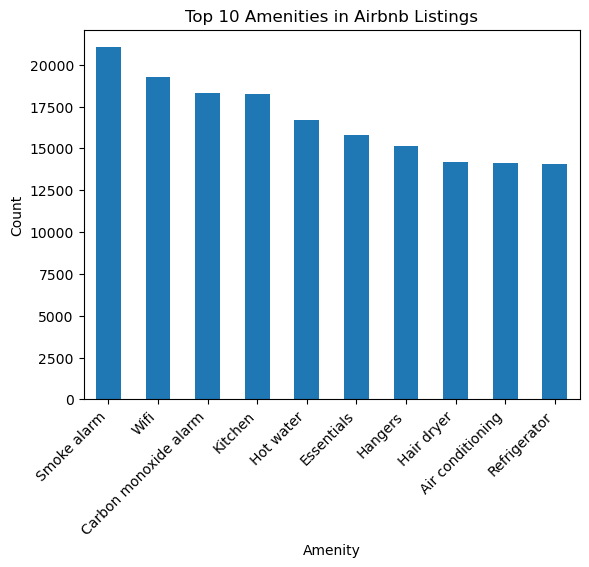

In [13]:
#EDA, check how many listings have a particular amenity and identify which amenities are most common
all_amenities = [amenity for sublist in df['amenities'] for amenity in sublist]
all_amenities = [amenity for amenity in all_amenities if amenity != ' ']
amenity_counts = pd.Series(all_amenities).value_counts()

#visualize the frequency of amenities
amenity_counts.head(10).plot(kind='bar')
plt.title('Top 10 Amenities in Airbnb Listings')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph above makes sense, all the amenities in the top 10 are necessary for everyday living. Next, we want to see if there are any specific amenities that drastically increase prices. We hypothesize that there is some sort of trend and that these amenities are likely not necessary, but nice to have.

In [14]:
#get more common amenities (so less time is used when executing code)
threshold = 10
common_amenities = amenity_counts[amenity_counts >= threshold]
common_amenities

Smoke alarm                             21035
Wifi                                    19239
Carbon monoxide alarm                   18299
Kitchen                                 18262
Hot water                               16668
                                        ...  
Dove                                       10
EV charger - level 1                       10
40 inch HDTV with Apple TV                 10
KitchenAid stainless steel gas stove       10
Game console: Nintendo Wii                 10
Name: count, Length: 480, dtype: int64

In [17]:
#now we create binary for amenities to see which amenities increase price
amenities_price = df[['amenities','price']].copy()
binary_columns = {amenity: amenities_price['amenities'].apply(lambda x: int(amenity in x)) for amenity in common_amenities.index}

#merge dataframes
binary_columns_df = pd.DataFrame(binary_columns)
amenities_price = pd.concat([amenities_price, binary_columns_df], axis=1)
amenities_price = amenities_price.drop(columns=['amenities'])
amenities_price.head()

,price,Smoke alarm,Wifi,Carbon monoxide alarm,Kitchen,Hot water,Essentials,Hangers,Hair dryer,Air conditioning,...,Kenmore gas stove,Generic conditioner,Game console: Xbox 360,65 inch HDTV with Fire TV,Immersive Sound,Dove,EV charger - level 1,40 inch HDTV with Apple TV,KitchenAid stainless steel gas stove,Game console: Nintendo Wii
0,89.0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,45.0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,107.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,140.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,340.0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


55 inch TV                        0.104910
Sauna                             0.095227
Paid valet parking on premises    0.087795
Crib                              0.071336
Elevator                          0.061204
                                    ...   
Kitchen                          -0.023074
Dishes and silverware            -0.024330
Laundromat nearby                -0.035058
Free street parking              -0.037062
Lock on bedroom door             -0.040657
Name: price, Length: 480, dtype: float64


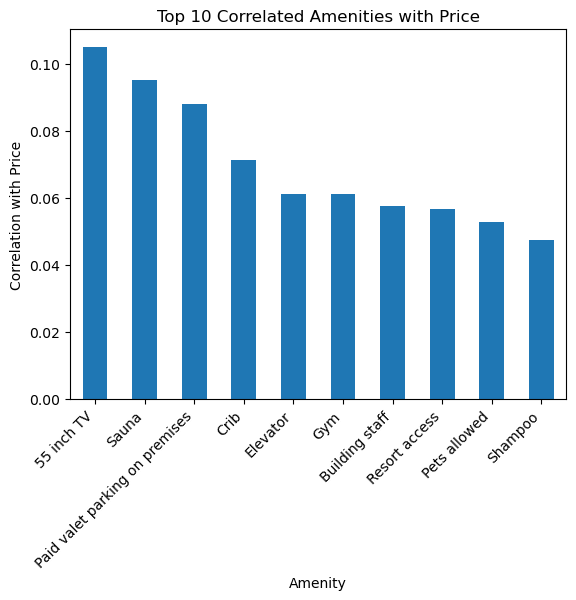

In [20]:
#correlation between amenities and price
amenities_corr = amenities_price.corr()['price'].drop('price')  # Drop price itself to avoid self-correlation
print(amenities_corr.sort_values(ascending=False))

#visualize the top 10 correlated amenities
amenities_corr.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Correlated Amenities with Price')
plt.xlabel('Amenity')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=45, ha='right')
plt.show()

The amenities here make sense to us. Just as we hypothesized, these amenities are not as necessary, but definitely nice to have. However, the highest correlation coefficient is 0.1, which is still relatively weak. So, we try a multiple regression to see if there is a better fit.

In [23]:
pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
#regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = amenities_price.drop(columns=['price'])
y = amenities_price['price']

#train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

#evaluate
y_pred = model.predict(x_test)
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: -0.06490217032795709


The R2 is negative, suggesting the model is not capturing meaningful relationships between amenities and price.

In [26]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# host info
# rooms, beds, bathrooms
# neighborhoods

### 2.4 Census Analysis